<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0812_7_model_3_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sequential() 모델 구성

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Dense(1, activation='sigmoid'))

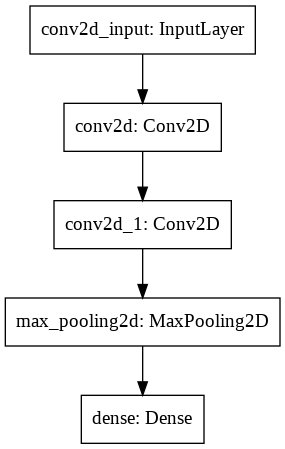

In [3]:
plot_model(model)

# 2. Subclass Model 구성

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense

In [5]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()

    self.first_conv = Conv2D(32, (3,3), activation='relu')
    self.second_conv = Conv2D(32, (3,3), activation='relu')
    self.maxpool = MaxPooling2D(strides=2)
    self.dense = Dense(1, activation='relu')

  def call(self, inputs):
    x = self.first_conv(inputs)
    x = self.second_conv(x)
    x = self.maxpool(x)
    x = self.dense(x)

    return x

model = MyModel()
# model.compile()
# model.fit()


# 3. 함수형 API model구성  = > 추천방식

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import Input

In [7]:
inputs = Input(shape = (224, 224, 3))

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs = inputs, outputs=x)

In [8]:
from google.colab import files

uploaded = files.upload()

Saving multi_input_output.png to multi_input_output.png


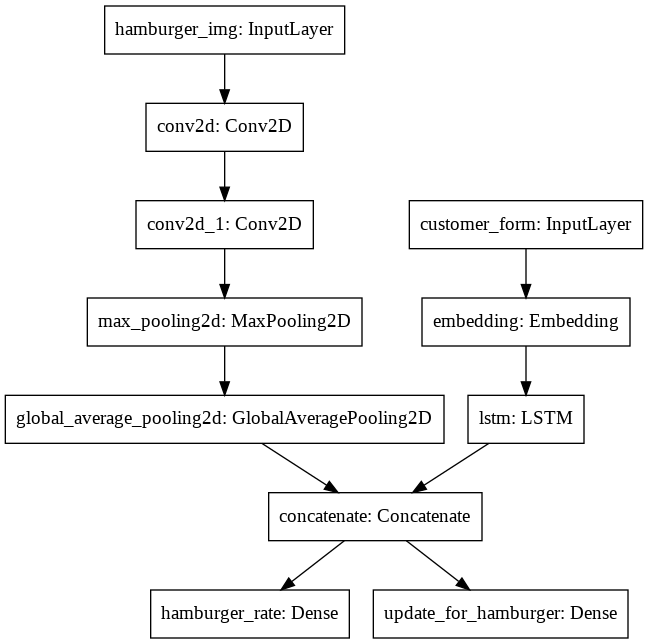

In [9]:
from IPython.display import Image
Image(filename='multi_input_output.png') 

In [10]:
# 가상데이터
import numpy as np
np.random.seed(2020)

# 이미지데이터, 텍스트 데이터 - 입력데이터
hamburger_img = np.random.random((1000, 28,28,1))
customer_form = np.random.randint(1000, size=(1000, 100))

# 햄버거평점, 식재료선택 - 아웃데이터
hamberger_rate = np.round(np.random.random((1000,)) * 5, 1)
update_ham = np.random.randint(50, size=(1000, 1))

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Dense, Concatenate

In [12]:
img_input = Input(shape = (28, 28,1), name='hamberger_img')
form_input = Input(shape = (None,), name='customer_form')

In [16]:
# 이미지처리
x1 = Conv2D(32, (3,3), activation='relu')(img_input)
x1 = Conv2D(32, (3,3), activation='relu')(x1)
x1 = MaxPooling2D(strides=2)(x1)
#x1 = GlobalAveragePooling2D(x1)

In [18]:
# 텍스트처리
x2 = Embedding(10000, 64)(form_input)
x2 = LSTM(128)(x2)

In [19]:
x = Concatenate([x1, x2])

In [20]:
rate_pred = Dense(1, name = 'hamberger_rate')(x)

AttributeError: ignored